### 用Python实现逻辑回归模型
1. 实现随机梯度下降
2. 数据集
    - Sklearn内置鸢尾花数据集
    - 共150条数据，3个类别，其中有一种和其他两种线性可分
    - 鸢尾花总共有4维特征
    - 评测模型的AUC（全部当训集，在训练集上评测即可）
    - 根据你的结果判断哪一类和其他两类线性可分

#### 1.  下载鸢尾花数据集

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

- iris的数据部分总共有4个特征，150条数据

In [6]:
type(iris.data)

numpy.ndarray

In [4]:
iris.target.shape

(150,)

- iris的标签部分共有150数据

In [7]:
type(iris.target)

numpy.ndarray

In [10]:
set(iris.target)

{0, 1, 2}

- 通过取target的集合，可以看到鸢尾花数据有三类，分别标号为0，1，2

- 在下面建立两个array数姐：一个数组X（其size为[n_samples, n_features]）：保存着训练样本；一个数组Y：保存着训练样本的target值（class label）

In [42]:
X = iris.data
Y = iris.target

#### 2. 将150行数据全部当训练集计算进行随机梯度下降

- 导入SGD分类器

In [43]:
from sklearn.linear_model import SGDClassifier

- 对数据X进行归一化

In [44]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std
h = .02

- 建立学习率$\alpha$为0.001，最大迭代次数为100次，默认L2正则化

In [45]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X,Y)

In [46]:
import numpy as np

- 原始的标签Y如图中所示

In [47]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 通过SGD建模预测的标签Y_hat如下所示

In [48]:
Y_hat = clf.predict(X)

In [49]:
Y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
from sklearn import metrics

In [53]:
accuracy = metrics.accuracy_score(Y, Y_hat)
confusionmatrix = metrics.confusion_matrix(Y, Y_hat)
target_names = ['class 0', 'class 1', 'class 2']
classifyreport = metrics.classification_report(Y, Y_hat,target_names=target_names)

In [54]:
print('分类准确率 ',accuracy) # 混淆矩阵对角线元素之和/所有元素之和
print('混淆矩阵 \n', confusionmatrix)
print('分类结果报告 \n', classifyreport)

分类准确率  0.94
混淆矩阵 
 [[49  1  0]
 [ 0 45  5]
 [ 0  3 47]]
分类结果报告 
               precision    recall  f1-score   support

     class 0       1.00      0.98      0.99        50
     class 1       0.92      0.90      0.91        50
     class 2       0.90      0.94      0.92        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



- 利用metrics中的roc_curve计算FPR和TPR

In [58]:
fpr, tpr, _ = metrics.roc_curve(Y, Y_hat,pos_label=2)
auc = metrics.auc(fpr, tpr)

In [66]:
fpr

array([0.  , 0.05, 0.51, 1.  ])

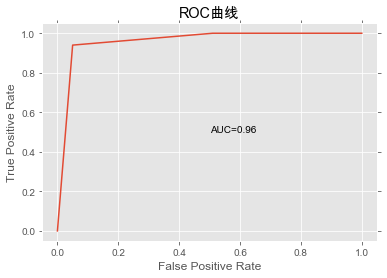

In [67]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.style.use('ggplot')   #设置绘图风格
plt.plot(fpr, tpr,'')    #绘制ROC曲线
# plt.plot((0,1),(0,1),'r--')   #绘制参考线
plt.text(0.5,0.5,'AUC=%.2f' %auc)   #添加文本注释
plt.title('ROC曲线')  #设置标题
plt.xlabel('False Positive Rate')   #设置坐标轴标签
plt.ylabel('True Positive Rate')
plt.tick_params(top='off', right='off') #去除图形顶部边界和右边界的刻度
plt.show()   #图形显示

- 为了更好的进行二维可视化，选择前2个特征进行研究

In [ ]:
X = iris.data[:, :2]
Y = iris.target

- 绘制网格

In [30]:
import matplotlib.pyplot as plt

In [31]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

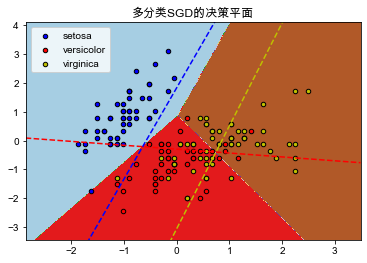

In [37]:
# 绘制决策边界，对每个点赋予相应的决策颜色进行区分
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# 将数据可视化
Z = Z.reshape(xx.shape)


cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')
colors = "bry"
# 绘制出所有的训练样本（这里把所有的样本当作训练样本来使用）
for i, color in zip(clf.classes_, colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("多分类SGD的决策平面")
plt.axis('tight')


# 将其中一类作为标准类，合并其余2类作为对比类，形成二分类模型进行比较
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

- 从上图可以看到setosa和其他两类鸢尾花是可以线性可分的